### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


### Sigmoid Function

In [2]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

### Cost Function

In [3]:
def compute_cost(X, y, w, b, lambda_=1):
    m, n = X.shape

    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    f_wb=sigmoid(z)
    
    cost = -(1/m) * np.sum(y*np.log(f_wb+1e-15) + (1-y)*np.log(1-f_wb+1e-15))
    reg_cost = (lambda_/(2*m)) * np.sum(w**2)

    return cost + reg_cost

### Computing Gradients

In [6]:
def compute_gradient(X, y, w, b, lambda_=1):
    m, n = X.shape
    dj_dw = np.zeros(n)
    dj_db = 0.0
    z=np.dot(X,w)+b
    f_wb=sigmoid(z)
    error=f_wb-y
    dj_dw=1/m*(np.dot(X.T,error))+ (lambda_/m)*w
    dj_db=1/m*(np.sum(error))

    return dj_db, dj_dw


### Gradient Descent

In [7]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters, lambda_=1):
    w = w_in.copy()
    b = b_in
    J_history = []

    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient(X, y, w, b, lambda_)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i % 100 == 0:
            cost = compute_cost(X, y, w, b, lambda_)
            J_history.append(cost)
            print(f"Iteration {i}: Cost {cost:.4f}")

    return w, b, J_history


## Prediction Function

In [8]:
def predict(X, w, b):
    m = X.shape[0]
    y_pred = np.zeros(m)

    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        y_pred[i] = 1 if f_wb_i >= 0.5 else 0

    return y_pred

### Loading Dataset And Preprocessing

In [4]:
data = pd.read_csv('../data/pulsar_data_train.csv')
train_df=data.drop('target_class', axis=1)
print(train_df.isna().sum())
df_mean=train_df.mean()
train_df.fillna(df_mean, inplace=True)
X=train_df.values
y=data.iloc[:, -1].values
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

Mean of the integrated profile                     0
Standard deviation of the integrated profile       0
Excess kurtosis of the integrated profile       1735
Skewness of the integrated profile                 0
Mean of the DM-SNR curve                           0
Standard deviation of the DM-SNR curve          1178
Excess kurtosis of the DM-SNR curve                0
Skewness of the DM-SNR curve                     625
dtype: int64
(10022, 8) (10022,)
(2506, 8) (2506,)


### Normalization

In [9]:
X_Mean = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)

X_train_scaled = (X_train - X_Mean) / sigma
X_test_scaled = (X_test - X_Mean) / sigma
X_train = X_train_scaled
X_test = X_test_scaled

In [10]:
print(X_train[:5, :])

[[ 8.94826457e-01  7.89497996e-01 -7.05798912e-01 -2.83050020e-01
  -3.36461381e-01 -5.74457844e-01  2.01713847e-02 -1.45116574e-01]
 [ 4.43269317e-01  4.13895270e-02  3.74560186e-03 -3.08627888e-01
  -3.51711399e-01 -2.21208013e-04  2.78613307e-01  2.44953376e-01]
 [ 4.49986191e-01  6.25621559e-01 -4.78122036e-01 -3.44297038e-01
   4.91707956e-01  1.40600482e+00 -1.43549032e+00 -9.93359417e-01]
 [ 3.62877973e-02 -6.13368082e-03 -4.24878027e-01 -2.60856587e-01
  -3.55276338e-01 -6.40610364e-01  2.67069367e-01  1.00059634e-01]
 [-1.44875205e+00 -1.26266286e+00  5.91141443e-01  3.15173396e-01
  -3.62802321e-01 -5.24175541e-01  5.93506597e-01  2.81546442e-01]]


In [11]:
m, n = X_train.shape
w = np.zeros(n)   
b = 0.0           
alpha = 0.5
num_iters = 1000  
lambda_ = 1     
w, b, cost_history = gradient_descent(X_train, y_train, w, b, alpha, num_iters, lambda_)

Iteration 0: Cost 0.5435
Iteration 100: Cost 0.0947
Iteration 200: Cost 0.0882
Iteration 300: Cost 0.0863
Iteration 400: Cost 0.0856
Iteration 500: Cost 0.0852
Iteration 600: Cost 0.0850
Iteration 700: Cost 0.0849
Iteration 800: Cost 0.0848
Iteration 900: Cost 0.0847


### Predicting

In [12]:
y_train_pred= predict(X_train, w, b)
y_test_pred= predict(X_test, w, b)

train_accuracy=np.mean(y_train_pred==y_train)*100
test_accuracy=np.mean(y_test_pred==y_test)*100
print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy: .2f}%")

TP=np.sum((y_test==1) & (y_test_pred==1))
TN=np.sum((y_test==0) & (y_test_pred==0))
FP=np.sum((y_test==0) & (y_test_pred==1))
FN=np.sum((y_test==1)& (y_test_pred==0))
print(f"Confusion Matrix:")
print("[[TN,FP]\n[FN,TP]]")
print(f"[[{TN},{FP}],\n[{FN},{TP}]]")

precision=TP/(TP+FP+1e-15)
recall=TP/(TP+FN+1e-15)
f1_score=2*(precision*recall)/(precision+recall+1e-15)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")



Train Accuracy: 97.47%
Test Accuracy:  98.16%
Confusion Matrix:
[[TN,FP]
[FN,TP]]
[[2268,7],
[39,192]]
Precision: 0.9648
Recall: 0.8312
F1-Score: 0.8930


### Sklearn Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

model = LogisticRegression()
model.fit(X_train, y_train)
y_test_pred_sklearn = model.predict(X_test)

### Metrics

In [15]:
test_accuracy_sklearn=np.mean(y_test_pred_sklearn==y_test)*100
print(f"Test Accuracy: {test_accuracy_sklearn: .2f}%")

TP=np.sum((y_test==1) & (y_test_pred_sklearn==1))
TN=np.sum((y_test==0) & (y_test_pred_sklearn==0))
FP=np.sum((y_test==0) & (y_test_pred_sklearn==1))
FN=np.sum((y_test==1)& (y_test_pred_sklearn==0))
print(f"Confusion Matrix:")
print("[[TN,FP]\n[FN,TP]]")
print(f"[[{TN},{FP}],\n[{FN},{TP}]]")

precision=TP/(TP+FP+1e-15)
recall=TP/(TP+FN+1e-15)
f1_score=2*(precision*recall)/(precision+recall+1e-15)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")


Test Accuracy:  98.16%
Confusion Matrix:
[[TN,FP]
[FN,TP]]
[[2268,7],
[39,192]]
Precision: 0.9648
Recall: 0.8312
F1-Score: 0.8930


## Save Results

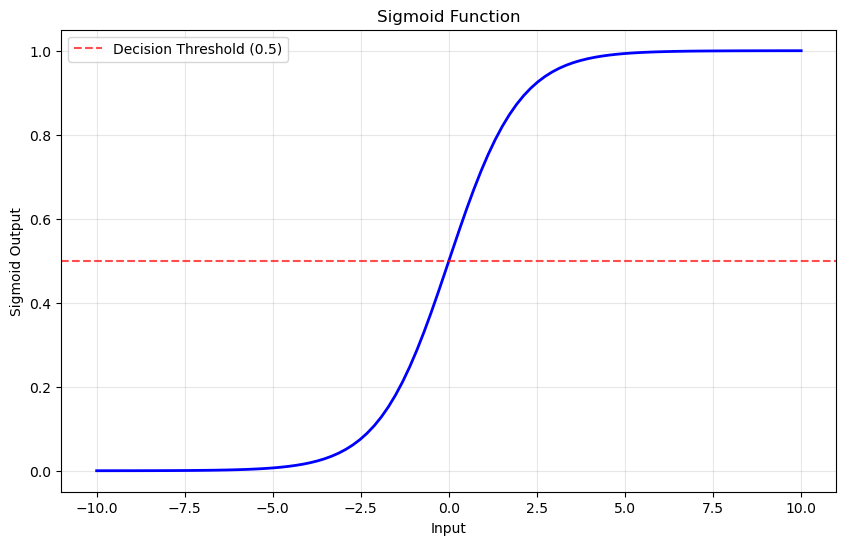

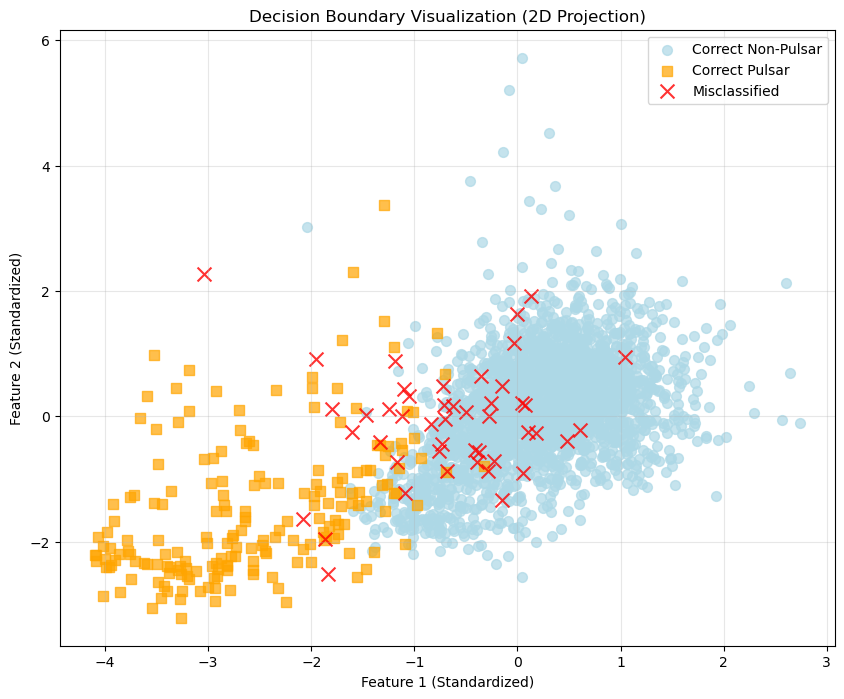

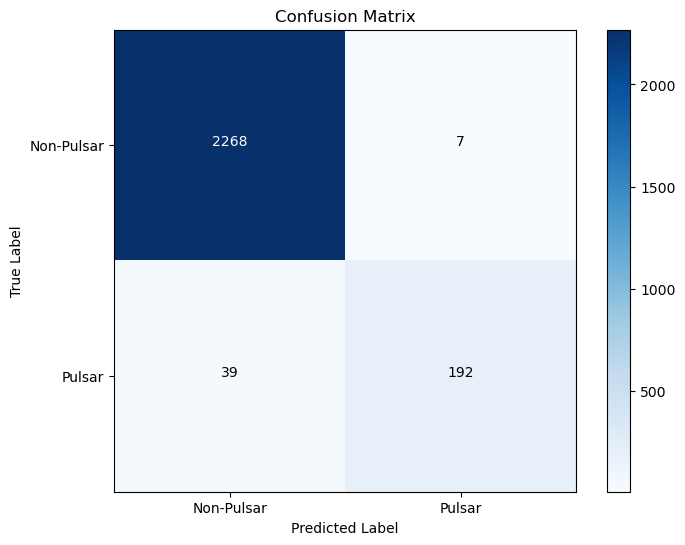

✅ Logistic Regression results saved to ../results/ folder!


In [17]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Save sigmoid curve visualization
x_vals = np.linspace(-10, 10, 100)
y_vals = sigmoid(x_vals)
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, 'b-', linewidth=2)
plt.title('Sigmoid Function')
plt.xlabel('Input')
plt.ylabel('Sigmoid Output')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='Decision Threshold (0.5)')
plt.legend()
plt.savefig('../results/sigmoid_curve.png', dpi=300, bbox_inches='tight')
plt.show()

# Save decision boundary visualization (simple 2D projection)
plt.figure(figsize=(10, 8))
threshold = 0.5
correct_class_0 = (y_test == 0) & (y_test_pred == 0)
correct_class_1 = (y_test == 1) & (y_test_pred == 1)
incorrect = (y_test != y_test_pred)

plt.scatter(X_test[correct_class_0, 0], X_test[correct_class_0, 1], 
           c='lightblue', marker='o', s=50, alpha=0.7, label='Correct Non-Pulsar')
plt.scatter(X_test[correct_class_1, 0], X_test[correct_class_1, 1], 
           c='orange', marker='s', s=50, alpha=0.7, label='Correct Pulsar')
plt.scatter(X_test[incorrect, 0], X_test[incorrect, 1], 
           c='red', marker='x', s=100, alpha=0.8, label='Misclassified')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.title('Decision Boundary Visualization (2D Projection)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('../results/decision_boundary.png', dpi=300, bbox_inches='tight')
plt.show()

# Save confusion matrix visualization
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Non-Pulsar', 'Pulsar'])
plt.yticks(tick_marks, ['Non-Pulsar', 'Pulsar'])

# Add text annotations
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('../results/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Logistic Regression results saved to ../results/ folder!")